<a href="https://colab.research.google.com/github/cychen116/DataAnalysis_practice/blob/main/12_ML_Log_DT_RT_Tatanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.kaggle.com/c/titanic/data

# Data Loading

In [107]:
#Data Basic
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt 
import seaborn as sns

sns.set_style("whitegrid")
sns.set_theme()
sns.despine()

%matplotlib inline

In [45]:
# Machine Learning
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"
!ls "/content/drive/MyDrive/Colab Notebooks/EMSE 6575/Data"

 archive.zip
'breast cancer.csv'
 breast_cancer_data.csv
'Breast Cancer Dignostics_google.ipynb'
'Breast Cancer Dignostics.ipynb'
 diamonds.csv
 gender_submission.csv
'Group Project 1 Text for Analysis -- full version(1).txt'
 HR_comma_sep.csv
 iris.csv
 spam.csv
 spam_resaved.xlsx
 spam.xlsx
 tatanic_submission.csv
 test.csv
 train.csv
 train-images-idx3-ubyte.gz
 train-labels-idx1-ubyte.gz


In [323]:
train = pd.read_csv(data_dir + '/train.csv', header=0)
test = pd.read_csv(data_dir + '/test.csv', header=0)
print("Train: " + str(train.shape))
print("Test: " + str(test.shape))
data.head()

Train: (891, 12)
Test: (418, 11)


,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,surname
0,0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train,mr
1,1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train,mrs
2,2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train,miss
3,3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train,mrs
4,4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train,mr


# Data Wrangling

**Variable Description**
- PassengerId : Uniques id number to each passenger
- Survived : Passenger survived(1) or died(0)
- Pclass : Passenger class
- Name : Name of passenger
- Sex : Gender of passenger
- Age : Age of passenger
- SibSp : Number of siblings/spouses
- Parch :Number of parent/children
- Ticket : Ticket number
- Fare : Amount of money for spendind ticket
- Cabin : Cabin category
- Embarked : Port where passenger embarked(C =Cherbourg , Q = Queenstoown ,S=Southampton )

In [293]:
df = train
df["Survived"] = df["Survived"].astype(bool)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    bool   
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 77.6+ KB


In [294]:
missing = df.isnull().sum().to_list()
numUnique = df.nunique().to_list()
unique = df.apply(pd.unique).to_list()
dataType = df.dtypes.to_list()
attr = df.columns.to_list()
cols = ['Attributes','Missing Num. ','Unique Num.','Unique Value','Data Type']
infoDF = pd.DataFrame(list(zip(attr, missing, numUnique, unique, dataType)),columns = cols )
infoDF.set_index(["Attributes"], inplace= True)
infoDF.index.name = None
infoDF

,Missing Num.,Unique Num.,Unique Value,Data Type
PassengerId,0,891,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",int64
Survived,0,2,"[False, True]",bool
Pclass,0,3,"[3, 1, 2]",int64
Name,0,891,"[Braund, Mr. Owen Harris, Cumings, Mrs. John B...",object
Sex,0,2,"[male, female]",object
Age,177,88,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0,...",float64
SibSp,0,7,"[1, 0, 3, 4, 2, 5, 8]",int64
Parch,0,7,"[0, 1, 2, 5, 3, 4, 6]",int64
Ticket,0,681,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803...",object
Fare,0,248,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51....",float64


In [295]:
df.drop(columns = ["Ticket","PassengerId"], inplace = True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [296]:
df.describe()

,Pclass,Age,SibSp,Parch,Fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


## Fill Missing Value

### Embarked

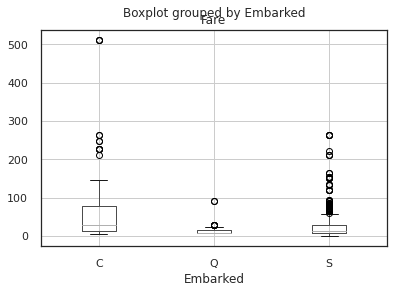

In [297]:
sns.set_style("white")
df.boxplot(column= "Fare",by = "Embarked")
plt.show()

In [298]:
df["Embarked"] = df["Embarked"].fillna("c")
df["Embarked"].isnull().sum()

0

### Cabin

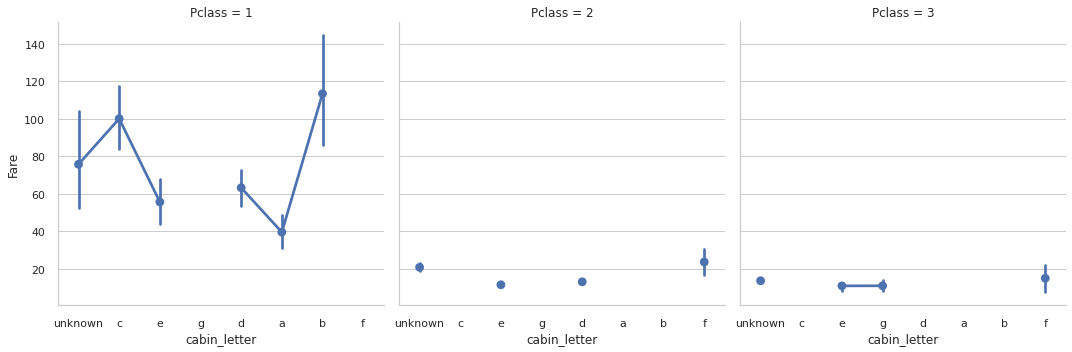

In [299]:
df['Cabin'][df['Cabin'].isnull() == True] = " "

def parse_cabin_letter(txt):
  cabin_letter = "unknown"
  if 'a' in txt.lower():
    cabin_letter = 'a'
  if 'b' in txt.lower():
    cabin_letter = 'b'
  if 'c' in txt.lower():
    cabin_letter = 'c'
  if 'd' in txt.lower():
    cabin_letter = 'd'
  if 'e' in txt.lower():
    cabin_letter = 'e'
  if 'f' in txt.lower():
    cabin_letter = 'f'
  if 'g' in txt.lower():
    cabin_letter = 'g'
  return cabin_letter

sns.set_style("whitegrid")
df['cabin_letter'] = df['Cabin'].apply(lambda x: parse_cabin_letter(x)) 
df['cabin_letter'].value_counts()
sns.factorplot('cabin_letter','Fare', col = 'Pclass', data=df)
plt.show()

### Age

In [303]:
import re
def parse_surname(txt):
  marital_status = "unknown"
  if 'mrs.' in txt.lower():
    marital_status = 'mrs'
  if 'mr.' in txt.lower():
     marital_status = 'mr'  
  if 'miss.' in txt.lower():
     marital_status = 'miss'  
  if 'master.' in txt.lower():
     marital_status = 'master'  
  return marital_status

df['surname'] = df['Name'].apply(lambda x: parse_surname(x)) 

died_mrs = len(df[(df['surname'] == 'mrs') & (df['Survived'] == 0)])
mrs = len(df[df['surname'] == 'mrs'])
death_rate_mrs = died_mrs/mrs
print("Total Mrs. Surname: " + str(mrs) + "\n" + "Mrs. Death Rate: " + str(death_rate_mrs) + "\n")

died_mr = len(df[(df['surname'] == 'mr') & (df['Survived'] == 0)])
mr = len(df[df['surname'] == 'mr'])
death_rate_mr = died_mr/mr
print("Total Mr. Surname: " + str(mr) + "\n" + "Mr. Death Rate: " + str(death_rate_mr) + "\n")

died_miss = len(df[(df['surname'] == 'miss') & (df['Survived'] == 0)])
miss = len(df[df['surname'] == 'miss'])
death_rate_miss = died_miss/miss
print("Total Miss. Surname: " + str(miss) + "\n" + "Miss Death Rate: " + str(death_rate_miss) + "\n")

died_master = len(df[(df['surname'] == 'master') & (df['Survived'] == 0) ])
master = len(df[df['surname'] == 'master'])
death_rate_master = died_master/master
print("Total Master Surname: " + str(master) + "\n" + "Master Death Rate: " + str(death_rate_master))

Total Mrs. Surname: 125
Mrs. Death Rate: 0.208

Total Mr. Surname: 517
Mr. Death Rate: 0.8433268858800773

Total Miss. Surname: 182
Miss Death Rate: 0.3021978021978022

Total Master Surname: 40
Master Death Rate: 0.425


In [304]:
df.groupby('surname')['Age'].mean()

surname
master      4.574167
miss       21.773973
mr         32.368090
mrs        35.898148
unknown    42.384615
Name: Age, dtype: float64

In [305]:
print("Missing ages: " + str(sum(df['Age'].isnull())))
df['Age'] = df['Age'].astype(float)
df.loc[(df.Age.isnull())&(df.surname=='mr'),'Age']=32.4
df.loc[(df.Age.isnull())&(df.surname=='mrs'),'Age']=35.9
df.loc[(df.Age.isnull())&(df.surname=='master'),'Age']=4.6
df.loc[(df.Age.isnull())&(df.surname=='miss'),'Age']=21.8
df.loc[(df.Age.isnull())&(df.surname=='unknown'),'Age']=42.4
print("Missing ages: " + str(sum(df['Age'].isnull())))

Missing ages: 177
Missing ages: 0


## Explore Features

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Survived      891 non-null    bool   
 1   Pclass        891 non-null    int64  
 2   Name          891 non-null    object 
 3   Sex           891 non-null    object 
 4   Age           891 non-null    float64
 5   SibSp         891 non-null    int64  
 6   Parch         891 non-null    int64  
 7   Fare          891 non-null    float64
 8   Cabin         891 non-null    object 
 9   Embarked      891 non-null    object 
 10  cabin_letter  891 non-null    object 
 11  surname       891 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(6)
memory usage: 77.6+ KB


### Survival Rate Visualization

In [148]:
def plot_ServialRate(df, variable):
  plt.figure(figsize = (4,6))
  sns.displot(data=df, x=variable, hue="Survived", multiple="stack",stat='percent')
  plt.title(f"Survial Rate of {variable}")
  plt.show()

<Figure size 288x432 with 0 Axes>

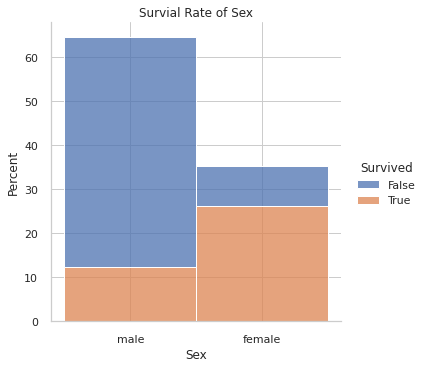

<Figure size 288x432 with 0 Axes>

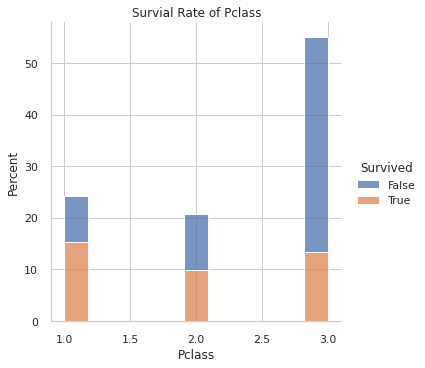

<Figure size 288x432 with 0 Axes>

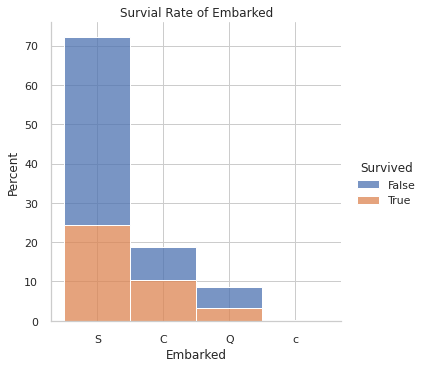

<Figure size 288x432 with 0 Axes>

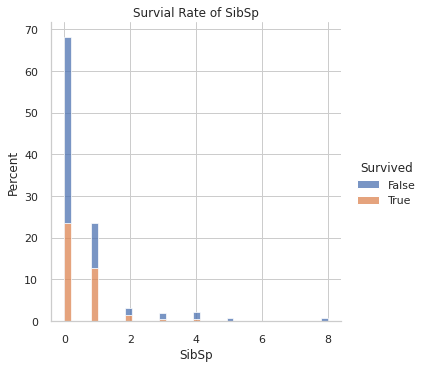

<Figure size 288x432 with 0 Axes>

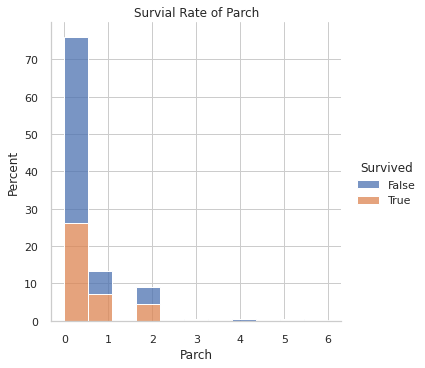

<Figure size 288x432 with 0 Axes>

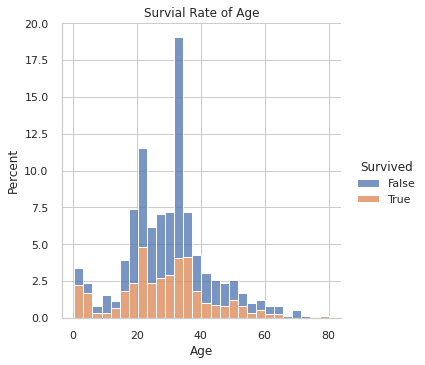

In [152]:
plot_cat = ["Sex","Pclass","Embarked","SibSp","Parch","Age"]
for c in plot_cat:
    plot_ServialRate(df, c)

### Age

<Figure size 288x432 with 0 Axes>

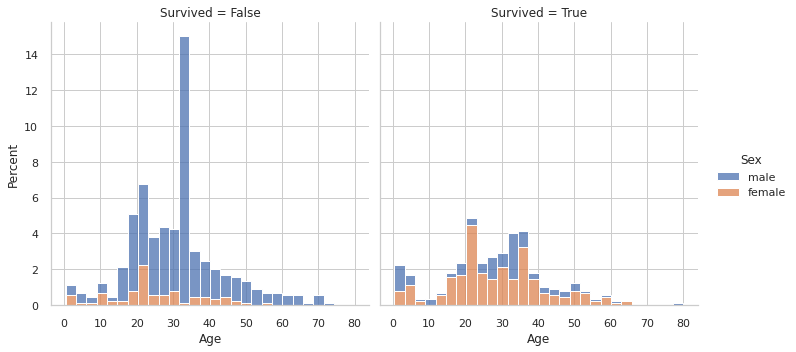

In [154]:
  plt.figure(figsize = (4,6))
  sns.displot(data=df, x="Age", hue="Sex", col="Survived",multiple="stack",stat='percent')
  plt.show()

In [226]:
age_cat = [0, 15, 25, 35, 60, 81]  
cat_names = ['child','young','adult','middle','senior'] # label tagging
df['Age_cat'] = pd.cut(df['Age'],
                          bins = age_cat,
                          labels=cat_names ,
                          include_lowest = True)
df['Age_cat'].value_counts()

adult     315
young     254
middle    213
child      87
senior     22
Name: Age_cat, dtype: int64

### Family

Text(0.5, 1.0, 'Survival and number of Group')

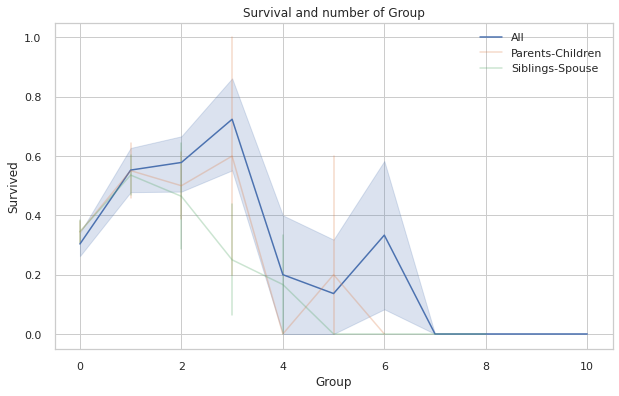

In [156]:
# Survival Rate that depends on the group
df["Group"] = df.SibSp + df.Parch
plt.figure(figsize=(10,6))
sns.lineplot(data=df,x="Group",y="Survived",label="All")
sns.lineplot(data=df,x="Parch",y="Survived",label="Parents-Children",alpha=.3,err_style="bars")
sns.lineplot(data=df,x="SibSp",y="Survived",label="Siblings-Spouse",alpha=.3,err_style="bars")
plt.title('Survival and number of Group')

<Figure size 720x432 with 0 Axes>

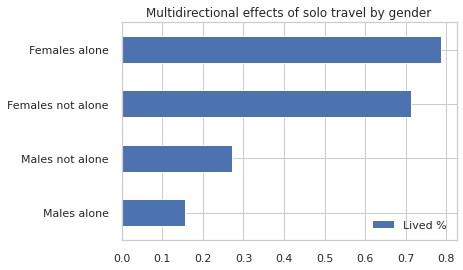

In [160]:
plt.figure(figsize=(10,6))
sns.set_style("whitegrid")
df["Alone"] = np.where(df['Group']==0, 1, 0)
alone_res = df.groupby(["Alone","Sex"]).agg({"Survived":["sum",lambda x:(x==0).sum()]})
alone_res.index = ['Females not alone','Males not alone','Females alone','Males alone']
alone_res.columns = ['Lived','Died']
alone_res['Lived %'] = alone_res['Lived'] / (alone_res['Lived'] + alone_res['Died'])
alone_res.sort_values(by='Lived %').plot(y='Lived %',kind='barh',title='Multidirectional effects of solo travel by gender');

mr         517
miss       182
mrs        125
master      40
unknown     27
Name: surname, dtype: int64

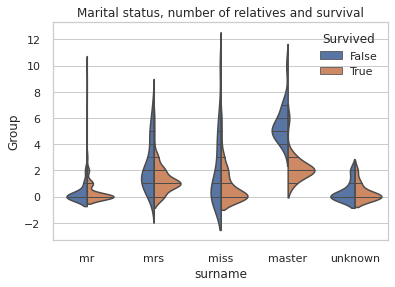

In [162]:
sns.violinplot(data=df,x="surname", y="Group",hue="Survived", split=True, inner="stick").set_title("Marital status, number of relatives and survival")

df.surname.value_counts()


In [223]:

# The Sage family apparently has 11 people on the cruise
# The father is Mr. John George Sage since he lists 9 children
# The mother is Msr. Annie Bullen Sage since she lists 9 children
# lots of the kids use a surname of Mr. and only one person has an age listed
df[['Name','Group', 'SibSp', 'Parch', 'Age']][df['Group'] == 10]

,Name,Group,SibSp,Parch,Age
159,"Sage, Master. Thomas Henry",10,8,2,4.6
180,"Sage, Miss. Constance Gladys",10,8,2,21.8
201,"Sage, Mr. Frederick",10,8,2,32.4
324,"Sage, Mr. George John Jr",10,8,2,32.4
792,"Sage, Miss. Stella Anna",10,8,2,21.8
846,"Sage, Mr. Douglas Bullen",10,8,2,32.4
863,"Sage, Miss. Dorothy Edith ""Dolly""",10,8,2,21.8


### Pclass

Text(0.5, 0.98, 'Relationship between ticket class and passenger gender and survival')

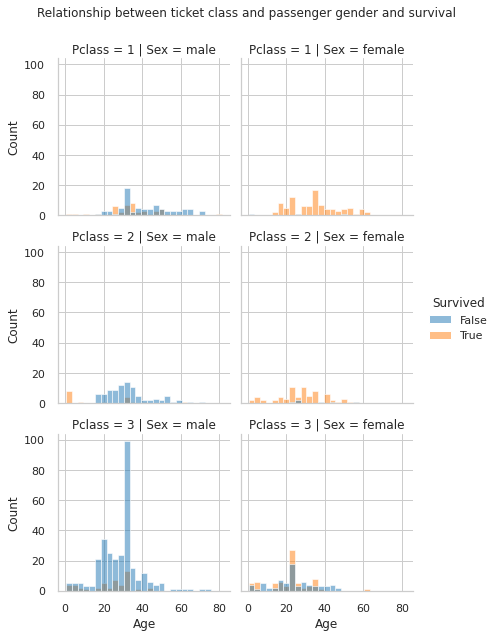

In [217]:
g = sns.displot(
    df, x="Age", hue="Survived", col="Sex", row="Pclass",
    binwidth=3, height=3, palette="tab10",
)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Relationship between ticket class and passenger gender and survival',fontsize=12, fontdict={"weight": "bold"})


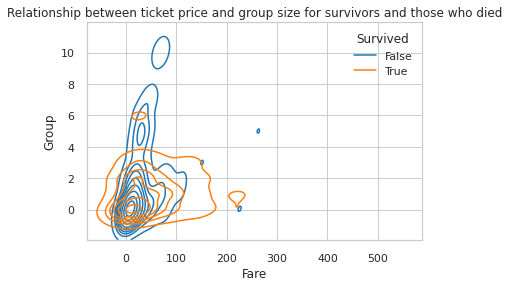

In [220]:
g = sns.kdeplot(data=df,x="Fare",y="Group", hue="Survived", palette="tab10")
plt.title("Relationship between ticket price and group size for survivors and those who died");

In [225]:
fare_cat = [0, 8, 30, 100]  # binning
cat_names = ['economy','business','first_class'] # label tagging
df['fare_cat'] = pd.cut(df['Fare'],
                          bins = fare_cat,
                          labels=cat_names,
                          include_lowest = True)
df['fare_cat'].value_counts()

business       416
economy        241
first_class    181
Name: fare_cat, dtype: int64

## One-hot encode categorical variables

In [236]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,cabin_letter,surname,Group,Alone,fare_cat,Age_cat
0,False,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,,S,unknown,mr,1,0,economy,young
1,True,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,c,mrs,1,0,first_class,middle
2,True,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,,S,unknown,miss,0,1,economy,adult
3,True,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,c,mrs,1,0,first_class,adult
4,False,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,,S,unknown,mr,0,1,business,adult


In [238]:
# One-hot encode the categorical variables 
df_onehot = pd.get_dummies(df.drop(columns=['Name','Cabin']))
df_onehot.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_c,cabin_letter_a,cabin_letter_b,cabin_letter_c,cabin_letter_d,cabin_letter_e,cabin_letter_f,cabin_letter_g,cabin_letter_unknown,surname_master,surname_miss,surname_mr,surname_mrs,surname_unknown,fare_cat_economy,fare_cat_business,fare_cat_first_class,Age_cat_child,Age_cat_young,Age_cat_adult,Age_cat_middle,Age_cat_senior
0,False,3,22.0,1,0,7.2500,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,True,1,38.0,1,0,71.2833,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,True,3,26.0,0,0,7.9250,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,True,1,35.0,1,0,53.1000,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,False,3,35.0,0,0,8.0500,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


## Scale numeric values

In [239]:
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
sc = StandardScaler()

numeric_vars = ['Group', 'Age', 'Fare']

# #only standardize numerical features
features=df[numeric_vars]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
temp=pd.DataFrame(features_standard,columns=numeric_vars)
#temp=pd.DataFrame(features,columns=numeric_vars)
temp.head()

,Group,Age,Fare
0,0.059160,-0.584814,-0.502445
1,0.059160,0.620899,0.786845
2,-0.560975,-0.283386,-0.488854
3,0.059160,0.394828,0.420730
4,-0.560975,0.394828,-0.486337


In [240]:
df_final= df_onehot
df_final['Group'] = temp['Group']
df_final['Age'] = temp['Age']
df_final['Fare'] = temp['Fare']
df_final.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Group,Alone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Embarked_c,cabin_letter_a,cabin_letter_b,cabin_letter_c,cabin_letter_d,cabin_letter_e,cabin_letter_f,cabin_letter_g,cabin_letter_unknown,surname_master,surname_miss,surname_mr,surname_mrs,surname_unknown,fare_cat_economy,fare_cat_business,fare_cat_first_class,Age_cat_child,Age_cat_young,Age_cat_adult,Age_cat_middle,Age_cat_senior
0,False,3,-0.584814,1,0,-0.502445,0.059160,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0
1,True,1,0.620899,1,0,0.786845,0.059160,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0
2,True,3,-0.283386,0,0,-0.488854,-0.560975,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0
3,True,1,0.394828,1,0,0.420730,0.059160,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0
4,False,3,0.394828,0,0,-0.486337,-0.560975,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0


# Logistic Model

In [250]:
X = df_final.drop(columns=['Survived'])
y = df_final['Survived']
print(X.shape)
print(y.shape)

(891, 34)
(891,)


In [251]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [252]:
import warnings
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
warnings.filterwarnings('ignore')

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

from itertools import compress
cols = list(compress(X_train.columns, rfe.support_))
new_X=X_train[cols]
new_y=y_train
# Implement the model
import statsmodels.api as sm
logit_model=sm.Logit(new_y,new_X)
result=logit_model.fit()
print(result.summary2())

[ True  True False False False  True False  True  True False False  True
 False False False False  True  True  True False False  True False  True
  True  True False False  True False False  True False False]
[ 1  1  3 12  8  1  4  1  1 16 17  1 15 10  9  7  1  1  1  2  5  1 13  1
  1  1 18 14  1 19  6  1 20 11]
         Current function value: 0.407978
         Iterations: 35
                                   Results: Logit
Model:                     Logit                  Pseudo R-squared:       0.384     
Dependent Variable:        Survived               AIC:                    610.9605  
Date:                      2022-02-24 06:58       BIC:                    679.4817  
No. Observations:          712                    Log-Likelihood:         -290.48   
Df Model:                  14                     LL-Null:                -471.54   
Df Residuals:              697                    LLR p-value:            1.1764e-68
Converged:                 0.0000                 Scale:     

In [256]:
new_features = new_X.columns.to_list()

In [259]:
X_test[new_features]

,Pclass,Age,Group,Sex_female,Sex_male,Embarked_S,cabin_letter_d,cabin_letter_e,cabin_letter_f,surname_master,surname_mr,surname_mrs,surname_unknown,fare_cat_first_class,Age_cat_adult
454,3,0.198900,-0.560975,0,1,1,0,0,0,0,1,0,0,0,1
624,3,-0.660171,-0.560975,0,1,1,0,0,0,0,1,0,0,0,0
537,1,0.018043,-0.560975,1,0,0,0,0,0,0,0,0,0,0,1
685,2,-0.358743,1.299429,0,1,0,0,0,0,0,1,0,0,1,0
396,3,0.093400,-0.560975,1,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,2,0.244114,0.679295,1,0,1,0,0,0,0,0,1,0,0,1
648,3,0.198900,-0.560975,0,1,1,0,0,0,0,1,0,0,0,1
421,3,-0.660171,-0.560975,0,1,0,0,0,0,0,1,0,0,0,0
879,1,1.977326,0.059160,1,0,0,0,0,0,0,0,1,0,1,0


In [262]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix, log_loss, explained_variance_score,r2_score
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score, mean_squared_log_error

MAE=  0.23858068425932386
MSE=  0.11390352659389205
RMS=  0.3374959653001678
EVS=  0.533574807839843
MSLE=  0.05504963821939285
R^2=  0.5302982116351487


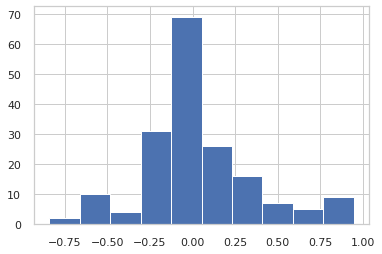

In [264]:

y_pred = result.predict(X_test[new_features])
errors = y_test - y_pred
errors.hist()
print('MAE= ', metrics.mean_absolute_error(y_test,y_pred))
print('MSE= ', metrics.mean_squared_error(y_test,y_pred))
print('RMS= ', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('EVS= ', explained_variance_score(y_test,y_pred))
print('MSLE= ', mean_squared_log_error(y_test,y_pred))
print('R^2= ', r2_score(y_test,y_pred))

# Decision Tree 

In [283]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


In [284]:
tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
y_pred = tree_clf.predict(X_test)
clf_report = classification_report(y_test, y_pred)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:
Accuracy Score: 82.68%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.80      0.93      0.86       105
        True       0.88      0.68      0.76        74

    accuracy                           0.83       179
   macro avg       0.84      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179

_______________________________________________
Confusion Matrix: 
 [[98  7]
 [24 50]]



# Radom Forest

In [286]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

from statistics import mean
from numpy import std

In [287]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=10)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best paramters: {'n_estimators': 600, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 110, 'bootstrap': False})


In [288]:
rf_clf = RandomForestClassifier(**rf_best_params)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
clf_report = classification_report(y_test, y_pred)
print("Train Result:\n================================================")
print(f"Accuracy Score: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("_______________________________________________")
print(f"CLASSIFICATION REPORT:\n{clf_report}")
print("_______________________________________________")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, y_pred)}\n")

Train Result:
Accuracy Score: 84.36%
_______________________________________________
CLASSIFICATION REPORT:
              precision    recall  f1-score   support

       False       0.81      0.95      0.88       105
        True       0.91      0.69      0.78        74

    accuracy                           0.84       179
   macro avg       0.86      0.82      0.83       179
weighted avg       0.85      0.84      0.84       179

_______________________________________________
Confusion Matrix: 
 [[100   5]
 [ 23  51]]



# Submission

In [324]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [325]:
missing = test.isnull().sum().to_list()
numUnique = test.nunique().to_list()
unique = test.apply(pd.unique).to_list()
dataType = test.dtypes.to_list()
attr = test.columns.to_list()
cols = ['Attributes','Missing Num. ','Unique Num.','Unique Value','Data Type']
infoDF = pd.DataFrame(list(zip(attr, missing, numUnique, unique, dataType)),columns = cols )
infoDF.set_index(["Attributes"], inplace= True)
infoDF.index.name = None
infoDF

,Missing Num.,Unique Num.,Unique Value,Data Type
PassengerId,0,418,"[892, 893, 894, 895, 896, 897, 898, 899, 900, ...",int64
Pclass,0,3,"[3, 2, 1]",int64
Name,0,418,"[Kelly, Mr. James, Wilkes, Mrs. James (Ellen N...",object
Sex,0,2,"[male, female]",object
Age,86,79,"[34.5, 47.0, 62.0, 27.0, 22.0, 14.0, 30.0, 26....",float64
SibSp,0,7,"[0, 1, 2, 3, 4, 5, 8]",int64
Parch,0,8,"[0, 1, 3, 2, 4, 6, 5, 9]",int64
Ticket,0,363,"[330911, 363272, 240276, 315154, 3101298, 7538...",object
Fare,1,169,"[7.8292, 7.0, 9.6875, 8.6625, 12.2875, 9.225, ...",float64
Cabin,327,76,"[nan, B45, E31, B57 B59 B63 B66, B36, A21, C78...",object


In [326]:
test['surname'] = test['Name'].apply(lambda x: parse_surname(x)) 
test['Age'] = test['Age'].astype(float)
test.loc[(test.Age.isnull())&(test.surname=='mr'),'Age']=32.4
test.loc[(test.Age.isnull())&(test.surname=='mrs'),'Age']=35.9
test.loc[(test.Age.isnull())&(test.surname=='master'),'Age']=4.6
test.loc[(test.Age.isnull())&(test.surname=='miss'),'Age']=21.8
test.loc[(test.Age.isnull())&(test.surname=='unknown'),'Age']=42.4
test["Group"] = test.SibSp + test.Parch
test["Alone"] = np.where(test['Group']==0, 1, 0)

In [327]:
test['cabin_letter'] = test['Cabin'].astype(str).apply(lambda x: parse_cabin_letter(x)) 

In [328]:
test["Fare"] = test["Fare"].fillna(np.mean(df[df["Pclass"] == 3]["Fare"]))

In [335]:
cat_names = ['child','young','adult','middle','senior'] # label tagging
test['Age_cat'] = pd.cut(test['Age'],
                          bins = age_cat,
                          labels=cat_names ,
                          include_lowest = True)

fare_cat = [0, 8, 30, 520]  # binning
cat_names = ['economy','business','first_class'] # label tagging
test['fare_cat'] = pd.cut(test['Fare'],
                          bins = fare_cat,
                          labels=cat_names,
                          include_lowest = True)

In [339]:
test_onehot = pd.get_dummies(test.drop(columns=['Name','Cabin']))
test_onehot.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Group,Alone,Sex_female,Sex_male,Ticket_110469,Ticket_110489,Ticket_110813,Ticket_111163,Ticket_112051,Ticket_112058,Ticket_112377,Ticket_112378,Ticket_112901,Ticket_113038,Ticket_113044,Ticket_113054,Ticket_113059,Ticket_113503,Ticket_113509,Ticket_113773,Ticket_113778,Ticket_113780,Ticket_113781,Ticket_113790,Ticket_113791,Ticket_113795,Ticket_113796,Ticket_113801,Ticket_11753,Ticket_11765,Ticket_11767,Ticket_11769,Ticket_11770,Ticket_11778,...,Ticket_SOTON/O.Q. 3101262,Ticket_SOTON/O.Q. 3101263,Ticket_SOTON/O.Q. 3101308,Ticket_SOTON/O.Q. 3101309,Ticket_SOTON/O.Q. 3101314,Ticket_SOTON/O.Q. 3101315,Ticket_SOTON/O2 3101284,Ticket_SOTON/OQ 392083,Ticket_STON/O 2. 3101268,Ticket_STON/O 2. 3101291,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Embarked_C,Embarked_Q,Embarked_S,surname_master,surname_miss,surname_mr,surname_mrs,surname_unknown,cabin_letter_a,cabin_letter_b,cabin_letter_c,cabin_letter_d,cabin_letter_e,cabin_letter_f,cabin_letter_g,Age_cat_child,Age_cat_young,Age_cat_adult,Age_cat_middle,Age_cat_senior,fare_cat_economy,fare_cat_business,fare_cat_first_class
0,892,3,34.5,0,0,7.8292,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,893,3,47.0,1,0,7.0000,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,894,2,62.0,0,0,9.6875,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,895,3,27.0,0,0,8.6625,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,896,3,22.0,1,1,12.2875,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [340]:
sc = StandardScaler()

numeric_vars = ['Group', 'Age', 'Fare']

# #only standardize numerical features
features=test[numeric_vars]
features_standard=StandardScaler().fit_transform(features)# Gaussian Standardisation
temp=pd.DataFrame(features_standard,columns=numeric_vars)
#temp=pd.DataFrame(features,columns=numeric_vars)
temp.head()

,Group,Age,Fare
0,-0.553443,0.330343,-0.497374
1,0.105643,1.289948,-0.512238
2,-0.553443,2.441474,-0.464061
3,-0.553443,-0.245420,-0.482436
4,0.764728,-0.629262,-0.417453


In [341]:
test_final= test_onehot
test_final['Group'] = temp['Group']
test_final['Age'] = temp['Age']
test_final['Fare'] = temp['Fare']
test_final.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Group,Alone,Sex_female,Sex_male,Ticket_110469,Ticket_110489,Ticket_110813,Ticket_111163,Ticket_112051,Ticket_112058,Ticket_112377,Ticket_112378,Ticket_112901,Ticket_113038,Ticket_113044,Ticket_113054,Ticket_113059,Ticket_113503,Ticket_113509,Ticket_113773,Ticket_113778,Ticket_113780,Ticket_113781,Ticket_113790,Ticket_113791,Ticket_113795,Ticket_113796,Ticket_113801,Ticket_11753,Ticket_11765,Ticket_11767,Ticket_11769,Ticket_11770,Ticket_11778,...,Ticket_SOTON/O.Q. 3101262,Ticket_SOTON/O.Q. 3101263,Ticket_SOTON/O.Q. 3101308,Ticket_SOTON/O.Q. 3101309,Ticket_SOTON/O.Q. 3101314,Ticket_SOTON/O.Q. 3101315,Ticket_SOTON/O2 3101284,Ticket_SOTON/OQ 392083,Ticket_STON/O 2. 3101268,Ticket_STON/O 2. 3101291,Ticket_STON/O2. 3101270,Ticket_STON/OQ. 369943,Ticket_W./C. 14260,Ticket_W./C. 14266,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W.E.P. 5734,Embarked_C,Embarked_Q,Embarked_S,surname_master,surname_miss,surname_mr,surname_mrs,surname_unknown,cabin_letter_a,cabin_letter_b,cabin_letter_c,cabin_letter_d,cabin_letter_e,cabin_letter_f,cabin_letter_g,Age_cat_child,Age_cat_young,Age_cat_adult,Age_cat_middle,Age_cat_senior,fare_cat_economy,fare_cat_business,fare_cat_first_class
0,892,3,0.330343,0,0,-0.497374,-0.553443,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0
1,893,3,1.289948,1,0,-0.512238,0.105643,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,894,2,2.441474,0,0,-0.464061,-0.553443,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0
3,895,3,-0.245420,0,0,-0.482436,-0.553443,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,896,3,-0.629262,1,1,-0.417453,0.764728,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [347]:
col_order = ["PassengerId"] + df_final.columns.to_list()
col_order

['PassengerId',
 'Survived',
 'Pclass',
 'Age',
 'SibSp',
 'Parch',
 'Fare',
 'Group',
 'Alone',
 'Sex_female',
 'Sex_male',
 'Embarked_C',
 'Embarked_Q',
 'Embarked_S',
 'Embarked_c',
 'cabin_letter_a',
 'cabin_letter_b',
 'cabin_letter_c',
 'cabin_letter_d',
 'cabin_letter_e',
 'cabin_letter_f',
 'cabin_letter_g',
 'cabin_letter_unknown',
 'surname_master',
 'surname_miss',
 'surname_mr',
 'surname_mrs',
 'surname_unknown',
 'fare_cat_economy',
 'fare_cat_business',
 'fare_cat_first_class',
 'Age_cat_child',
 'Age_cat_young',
 'Age_cat_adult',
 'Age_cat_middle',
 'Age_cat_senior']

In [348]:
col_order = ["PassengerId"] + df_final.drop(columns = ['Survived']).columns.to_list()
test_final['Embarked_c'] = 0
test_final['cabin_letter_unknown'] = 0
test_final = test_final[col_order]

In [349]:
X_pred = test_final.drop(columns = ["PassengerId"])

In [352]:
y_pred = rf_clf.predict(X_pred)
submission1 = pd.DataFrame({"PassengerId": test['PassengerId'].tolist(),
                            "Survived": y_pred})
submission1["Survived"] = submission1["Survived"].astype(int)

submission1.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [354]:
submission1.to_csv(data_dir + "/submission_final.csv",index=False)